# Data Plotting

Name: Ningxin Kang (nik010@ucsd.edu)

Last update: 10/04/2022

### Dataset Description:
We have 9 mice models in the cohurt and each mice taken 4 pictures:
+ 5 control
+ 4 BHB

In total, we have 20 pictures for control mice and 16 pictures for BHB mice.


In [1247]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.ticker as mtick
import re

In [1248]:
# Import dataframe filtered by tau aggregate size
# 1.5e-7 > IntDen > 0.416e-09 cm^2
# REASON for filter (?????)
df_sum = pd.read_csv('filtered_agg+CTRL_1.csv',sep = ',')
# Check the dimension of the dataframe
print(df_sum.shape)
# Each row in the dataframe represent an aggregate found
# The second portion in the 'Label' section represent the ID for the mice
print(df_sum.head())

(4620, 12)
   sample_index                                              Label    Area  \
0             1  LG355_204_BHB_6.5_10x_DAPI100ms_GFP_100ms_1_XY...  141.40   
1             2  LG355_204_BHB_6.5_10x_DAPI100ms_GFP_100ms_1_XY...   16.64   
2             3  LG355_204_BHB_6.5_10x_DAPI100ms_GFP_100ms_1_XY...    8.32   
3             4  LG355_204_BHB_6.5_10x_DAPI100ms_GFP_100ms_1_XY...   66.56   
4             6  LG355_204_BHB_6.5_10x_DAPI100ms_GFP_100ms_1_XY...   95.69   

    Mean  Mode  Min  Max    IntDen  RawIntDen category       mouse_id  \
0  255.0   255  255  255  0.000036       8670      BHB  LG355_204_BHB   
1  255.0   255  255  255  0.000004       1020      BHB  LG355_204_BHB   
2  255.0   255  255  255  0.000002        510      BHB  LG355_204_BHB   
3  255.0   255  255  255  0.000017       4080      BHB  LG355_204_BHB   
4  255.0   255  255  255  0.000024       5865      BHB  LG355_204_BHB   

        picture_id  
0  LG355_204_BHB_1  
1  LG355_204_BHB_1  
2  LG355_204_BHB_1

## 1. Area Size Distribution of Single Aggregates

Freedman–Diaconis bin width: 3.4968261490383283


/Users/sylvia618/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


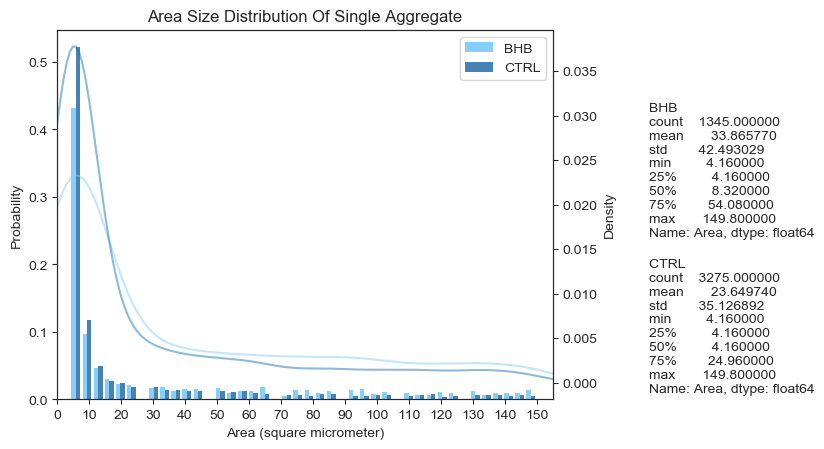

In [1249]:
# there is Freedman–Diaconis rule to be more scientific in choosing the "right" bin width:
# Bin width = 2 * IQR/ (n^(-1/3))
q25, q75 = np.percentile(df_sum["Area"], [25, 75])
bin_width = 2 * (q75 - q25) * len(df_sum["Area"]) ** (-1/3)
bins = round((df_sum["Area"].max() - df_sum["Area"].min()) / bin_width)
print("Freedman–Diaconis bin width:", bin_width)

# Caluclate the weight of each 
BHB_weight = np.ones_like(df_sum[df_sum.category == "BHB"]["Area"]) / len(df_sum[df_sum.category == "BHB"]["Area"])
CTRL_weight = np.ones_like(df_sum[df_sum.category == "CTRL"]["Area"]) / len(df_sum[df_sum.category == "CTRL"]["Area"])

# Plot histogram
fig, ax1 = plt.subplots()
plt.hist(x = [df_sum[df_sum.category == "BHB"]["Area"],df_sum[df_sum.category == "CTRL"]["Area"]], 
         color = ['lightskyblue', 'steelblue'],
         label = ['BHB','CTRL'],
         weights = [[BHB_weight[0]]*len(BHB_weight),[CTRL_weight[0]]*len(CTRL_weight)],     # adjust weights so that y-axis calculate the probability
         bins = bins,
         edgecolor='none')


# Add density curves
ax2 = ax1.twinx()
sns.kdeplot(df_sum[df_sum.category == "BHB"]["Area"], color = 'lightskyblue', alpha = 0.5,ax = ax2)
sns.kdeplot(df_sum[df_sum.category == "CTRL"]["Area"], alpha = 0.5,ax = ax2)

# Add statistical information to the figure
BHB_stat = df_sum[df_sum.category == "BHB"]["Area"].describe()
CTRL_stat = df_sum[df_sum.category == "CTRL"]["Area"].describe()
plt.figtext(1.05, 0.45, "BHB \n" + str(BHB_stat))
plt.figtext(1.05, 0.125, "CTRL \n" + str(CTRL_stat))

# Modify other figure elements
plt.title("Area Size Distribution Of Single Aggregate")
ax1.legend()
ax1.set_xlabel("Area (square micrometer)")
ax1.set_ylabel("Probability")
ax2.set_ylabel("Density")

# Modify the x-axis label and ticks, change according to using data range
plt.xlim(0,155)
plt.xticks(np.arange(0,155,10))

# Save figure
plt.savefig('result/area_per_aggregate.png', bbox_inches='tight',dpi = 200)
plt.show()

## 2. Integrated Density Distribution of Single Aggregates

Freedman–Diaconis bin width: 8.917387013309967e-07


/Users/sylvia618/miniconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:102: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order)


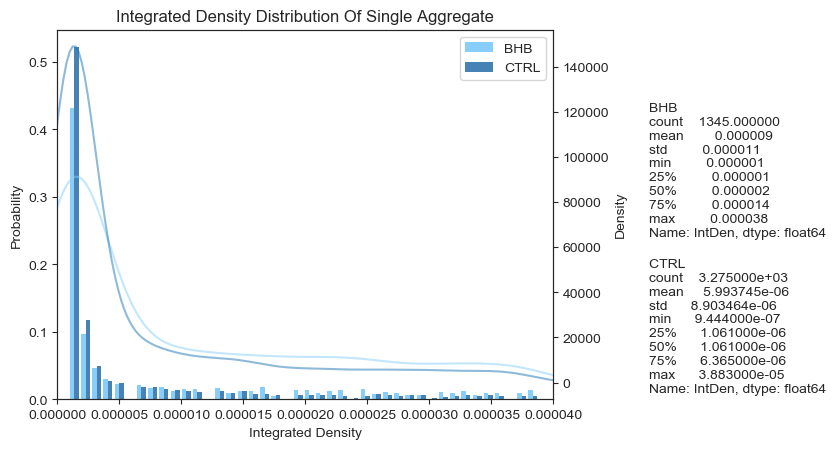

In [1250]:
# there is Freedman–Diaconis rule to be more scientific in choosing the "right" bin width:
# Bin width = 2 * IQR/ (n^(-1/3))
q25, q75 = np.percentile(df_sum["IntDen"], [25, 75])
bin_width = 2 * (q75 - q25) * len(df_sum["IntDen"]) ** (-1/3)
bins = round((df_sum["IntDen"].max() - df_sum["IntDen"].min()) / bin_width)
print("Freedman–Diaconis bin width:", bin_width)

# Caluclate the weight of each 
BHB_weight = np.ones_like(df_sum[df_sum.category == "BHB"]["IntDen"]) / len(df_sum[df_sum.category == "BHB"]["IntDen"])
CTRL_weight = np.ones_like(df_sum[df_sum.category == "CTRL"]["IntDen"]) / len(df_sum[df_sum.category == "CTRL"]["IntDen"])

# Plot histogram
fig, ax1 = plt.subplots()
plt.hist(x = [df_sum[df_sum.category == "BHB"]["IntDen"],df_sum[df_sum.category == "CTRL"]["IntDen"]], 
         color = ['lightskyblue', 'steelblue'],
         label = ['BHB','CTRL'],
         weights = [[BHB_weight[0]]*len(BHB_weight),[CTRL_weight[0]]*len(CTRL_weight)],     # adjust weights so that y-axis calculate the probability
         bins = bins,
         edgecolor='none')

# Add density curves
ax2 = ax1.twinx()
sns.kdeplot(df_sum[df_sum.category == "BHB"]["IntDen"], color = 'lightskyblue', alpha = 0.5,ax = ax2)
sns.kdeplot(df_sum[df_sum.category == "CTRL"]["IntDen"], alpha = 0.5,ax = ax2)

# Add statistical information to the figure
BHB_stat = df_sum[df_sum.category == "BHB"]["IntDen"].describe()
CTRL_stat = df_sum[df_sum.category == "CTRL"]["IntDen"].describe()
plt.figtext(1.05, 0.45, "BHB \n" + str(BHB_stat))
plt.figtext(1.05, 0.125, "CTRL \n" + str(CTRL_stat))

# Modify other figure elements
plt.title("Integrated Density Distribution Of Single Aggregate")
ax1.legend()
ax1.set_xlabel("Integrated Density")
ax1.set_ylabel("Probability")
ax2.set_ylabel("Density")

# Modify the x-axis label and ticks, change according to using data range
plt.xlim(0,0.00004)
plt.xticks(np.arange(0,0.000041,0.000005), rotation = 45)

# Save figure
plt.savefig('result/IntDen_per_aggregate.png', bbox_inches='tight',dpi = 200)
plt.show()

## 3. Average number of aggregates per picture

In [1251]:
# Import dataframe
avg_agg_per_pic = pd.read_csv('avg_agg_per_pic.csv',sep = ',')
# Check the dimension of the dataframe
print(avg_agg_per_pic.shape)
# Each row in the dataframe represent a picture taken  of a well
print(avg_agg_per_pic.head())

(36, 4)
         mouse_id category        picture_id  num_aggregates
0   LG355_204_BHB      BHB   LG355_204_BHB_1             127
1   LG355_204_BHB      BHB   LG355_204_BHB_2              84
2   LG355_204_BHB      BHB   LG355_204_BHB_3              86
3   LG355_204_BHB      BHB   LG355_204_BHB_4              93
4  LG355_206_CTRL     CTRL  LG355_206_CTRL_1             178


<Figure size 640x480 with 0 Axes>

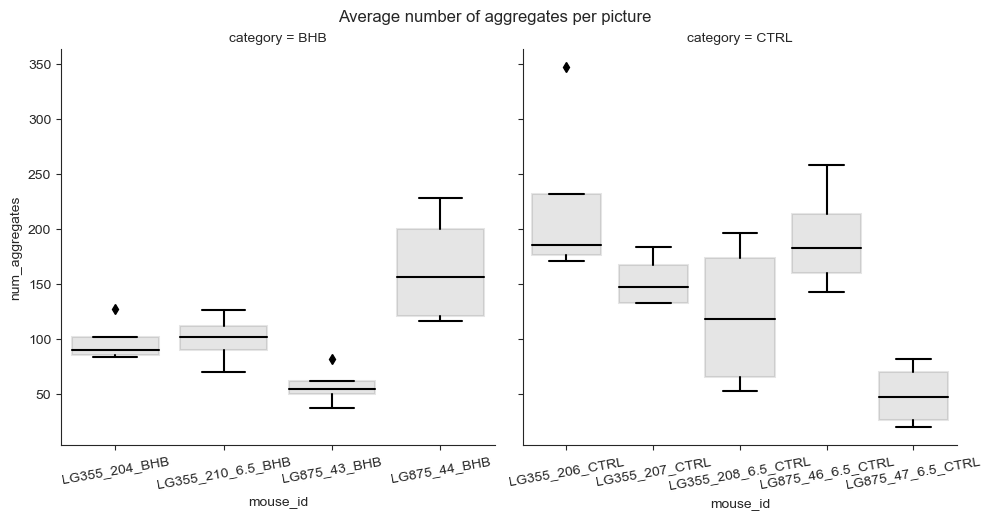

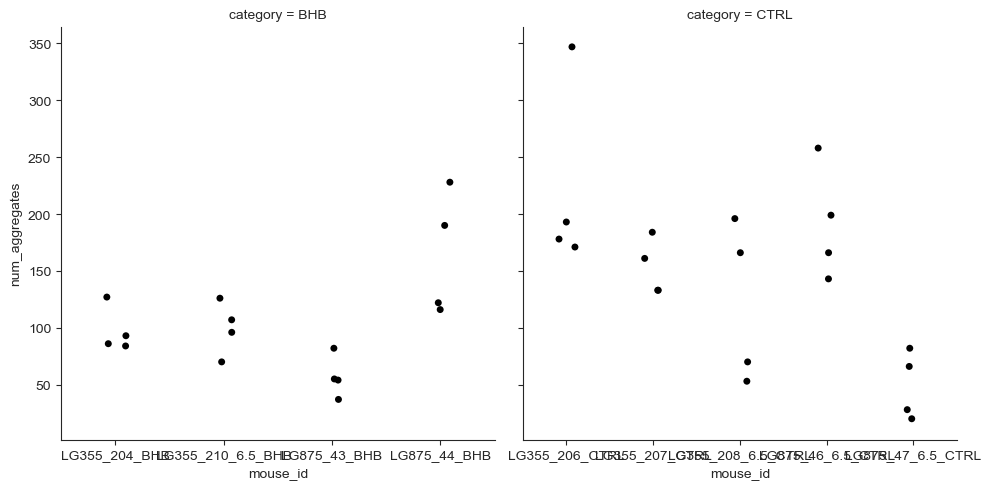

In [1300]:
plt.figure()

g = sns.catplot(data = avg_agg_per_pic, x = 'mouse_id', y='num_aggregates', kind = "box", boxprops=dict(alpha=0.1),
            col = "category", sharex=False, color = "black")         # Set up two facets by category
sns.catplot(data = avg_agg_per_pic, x = 'mouse_id', y='num_aggregates', 
            col = "category", sharex=False, color = "black")         # Set up two facets by category
# Modify title
g.fig.suptitle('Average number of aggregates per picture')
g.fig.subplots_adjust(top=0.9)

# Modify x/y axis and title
g.set_xticklabels(rotation = 10)
plt.ylabel("Number of Aggregates")

# Save figure
plt.savefig('result/num_aggregate_per_pic.png', bbox_inches='tight',dpi = 200)
plt.show()

## 4. Average number of aggregates per mouse

In [1301]:
# Import dataframe
avg_agg_per_mouse = pd.read_csv('avg_agg_per_mouse.csv',sep = ',')
# Check the dimension of the dataframe
print(avg_agg_per_mouse.shape)
# Each row in the dataframe represent a picture taken  of a well
print(avg_agg_per_mouse.head())

(9, 3)
             mouse_id  num_aggregates category
0       LG355_204_BHB           97.50      BHB
1      LG355_206_CTRL          222.25     CTRL
2      LG355_207_CTRL          152.75     CTRL
3  LG355_208_6.5_CTRL          121.25     CTRL
4   LG355_210_6.5_BHB           99.75      BHB


<Figure size 640x480 with 0 Axes>

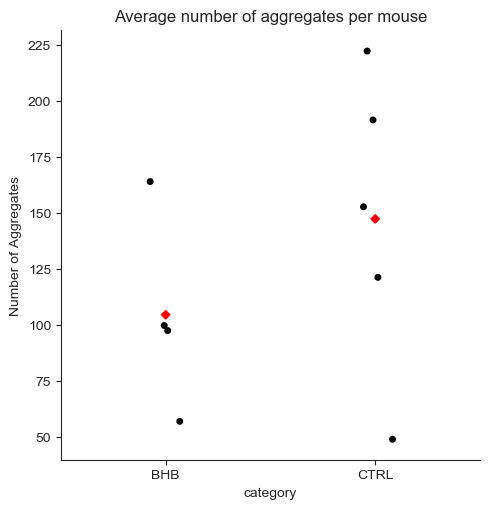

In [1302]:
plt.figure()
sns.catplot(data = avg_agg_per_mouse, x = 'category', y='num_aggregates', color = "black")
sns.pointplot(data=avg_agg_per_mouse, x = 'category', y='num_aggregates', estimator=np.mean,
              join=False, ci = None, color='red',markers = ['D'],scale = 0.6)
# Modify title
plt.title('Average number of aggregates per mouse')
# Modify x/y axis and title
plt.ylabel("Number of Aggregates")

# Save figure
#plt.savefig('result/num_aggregate_per_mouse.png', bbox_inches='tight',dpi = 200)
plt.show()